<a href="https://colab.research.google.com/github/sujiraa/bsc_dpdm22/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์
Load ตารางจาก google sheet

Table บ้าน

In [1]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

นำgoogle sheet เข้า


In [3]:
link = 'https://docs.google.com/spreadsheets/d/16Vgq75Q5cOd2adZk-rjMZT_gXZFRlglh0tj4DU7717I/export?format=xlsx'
Home = pd.read_excel(link, sheet_name='home')

นำgoogle sheet เข้า เเบบมาตรฐาน

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ =default()

gc = gspread.authorize(creds)

In [5]:
gsht = gc.open_by_key('16Vgq75Q5cOd2adZk-rjMZT_gXZFRlglh0tj4DU7717I') #ลิ้ง

In [9]:
worksheet = gsht.worksheet('home') #ชีทที่จะอ่าน

In [15]:
rows = worksheet.get_all_values()
home = pd.DataFrame.from_records(rows)

In [17]:
home.colume = home.iloc[0] #rowเเรกเป็นหัวตาราง ต้องตัดออก
home.head()

,0,1,2,3,4,5,6,7,8
0,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,01,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000,"5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,02,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,01,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000,"5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,02,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [18]:
home = home.iloc[1:].reset_index().iloc[:,1:]# ตัดหัวตารางออก

In [19]:
home.head()

,0,1,2,3,4,5,6,7,8
0,01,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000,"5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,02,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,01,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000,"5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,02,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,01,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000,"5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
id1 = Home[Home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = Home[Home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [ ]:
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
id2 = id2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
tableHome = id2[['post id','ความมั่นใจในการเมินราคาทรัพย์','ราคาทรัพย์','ประเมิน1','ประเมิน2','ให้คะแนนทรัพย์']]
tableHome # we got table 

,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/25,มั่นใจ,2890000,2500000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/33,มั่นใจ,2600000,2200000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,https://nayoo.co/khonkaen/posts/495,มั่นใจ,6050000,5000000.0,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,https://nayoo.co/khonkaen/posts/564,มั่นใจ,4400000,3500000.0,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/566,มั่นใจ,2750000,2500000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,มั่นใจ,260000,550000.0,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,https://nayoo.co/khonkaen/posts/6256,มั่นใจ,610000,700000.0,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,https://nayoo.co/khonkaen/posts/6257,มั่นใจ,295000,500000.0,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,https://nayoo.co/khonkaen/posts/6258,มั่นใจ,615000,600000.0,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
def checkvalue(a, b):
  return max(a/b, b/a)

In [ ]:
check1 = list() # ตั้งให้ check2 เป็น list ว่าง เพื่อให้ for loop มันรันค่าใส่ไว่้ใน list
check2 = list()
for row in tableHome.iterrows():
    check1.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
    check2.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
check1
check2
# แต่ละ row ใน table จะทำใช้ function 'checkvalue' เพื่อหาค่าแล้วเพิ่มใน check1

[1.0703703703703704,
 1.0833333333333333,
 1.487603305785124,
 1.1891891891891893,
 1.1,
 1.0314685314685315,
 1.050420168067227,
 1.0416666666666667,
 1.1403333333333334,
 1.0175,
 1.0476190476190477,
 1.03125,
 1.0214285714285714,
 1.0607142857142857,
 1.025,
 1.0607142857142857,
 1.0847222222222221,
 1.0371428571428571,
 1.0,
 1.125,
 1.1049723756906078,
 1.1904761904761905,
 1.0888888888888888,
 1.0054461667364893,
 1.0425531914893618,
 1.125,
 1.0434782608695652,
 1.0364145658263306,
 1.0,
 1.0324483775811208,
 1.04,
 1.2,
 1.04,
 1.1318181818181818,
 1.0,
 1.045,
 1.0526315789473684,
 3.3333333333333335,
 1.0227272727272727,
 1.04,
 1.08,
 1.2903225806451613,
 1.1219512195121952,
 1.125,
 1.075268817204301,
 1.2322941176470588,
 1.0755555555555556,
 1.0775862068965518,
 1.169004676018704,
 1.0158013544018059,
 1.048951048951049,
 1.1777777777777778,
 1.045,
 1.0666666666666667,
 1.0435897435897437,
 1.036,
 1.046,
 1.0857142857142856,
 1.0117361392148927,
 1.1090909090909091,
 1.

In [ ]:
tableHome['Check1'] = check1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
tableHome['Check2'] = check2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2
tableHome.sort_values(by=['Check2'],ascending=False)

<ipython-input-123-14971fd11754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableHome['Check1'] = check1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
<ipython-input-123-14971fd11754>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableHome['Check2'] = check2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
802,https://nayoo.co/khonkaen/posts/3208,มั่นใจ,23900000,2300000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,มั่นใจ,2850000,2500000.0,29000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,มั่นใจ,8019000,7900000.0,80000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,มั่นใจ,390000,600000.0,1300000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,มั่นใจ,1450000,3500000.0,3000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2.413793,2.068966
...,...,...,...,...,...,...,...,...
806,https://nayoo.co/khonkaen/posts/3210,มั่นใจ,2390000,2500000.0,2390000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.046025,1.000000
169,https://nayoo.co/khonkaen/posts/11264,มั่นใจ,6500000,5600000.0,6500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.160714,1.000000
763,https://nayoo.co/khonkaen/posts/2319,มั่นใจ,1200000,1200000.0,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.000000,1.000000
1149,https://nayoo.co/khonkaen/posts/6096,มั่นใจ,2200000,2200000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.000000,1.000000


In [ ]:
#index 544 ประเมิน2= 29 ล้าน -> 2.9 ล้าน [234]
#index 292 ประเมิน2= 80 ล้าน -> 8.0 ล้าน [131]
missing1 = tableHome.iloc[131,4]/10
missing2 = tableHome.iloc[234,4]/10
tableHome.iloc[131,4] = missing1
tableHome.iloc[234,4] = missing2
tableHome.sort_values(by=['Check2'],ascending=False)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
802,https://nayoo.co/khonkaen/posts/3208,มั่นใจ,23900000,2300000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,มั่นใจ,2850000,2500000.0,2900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,มั่นใจ,8019000,7900000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,มั่นใจ,390000,600000.0,1300000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,มั่นใจ,1450000,3500000.0,3000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2.413793,2.068966
...,...,...,...,...,...,...,...,...
806,https://nayoo.co/khonkaen/posts/3210,มั่นใจ,2390000,2500000.0,2390000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.046025,1.000000
169,https://nayoo.co/khonkaen/posts/11264,มั่นใจ,6500000,5600000.0,6500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.160714,1.000000
763,https://nayoo.co/khonkaen/posts/2319,มั่นใจ,1200000,1200000.0,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.000000,1.000000
1149,https://nayoo.co/khonkaen/posts/6096,มั่นใจ,2200000,2200000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.000000,1.000000


In [ ]:
id1MAPE = MAPE(tableHome['ประเมิน1'],pd.to_numeric(tableHome['ราคาทรัพย์']))
id2MAPE = MAPE(tableHome['ประเมิน2'],pd.to_numeric(tableHome['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
one2two = MAPE(tableHome['ประเมิน1'],tableHome['ประเมิน2'])
two2one = MAPE(tableHome['ประเมิน2'],tableHome['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tableHome)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.99%
นักประเมิน คนที่ 2 = 10.78%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.43%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


Plot Graph

In [ ]:
!pip install squarify
import matplotlib.pyplot as plt
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tableHome.columns

Index(['post id', 'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมิน1',
       'ประเมิน2', 'ให้คะแนนทรัพย์', 'Check1', 'Check2'],
      dtype='object')

In [ ]:
homecorr = tableHome[['ราคาทรัพย์', 'ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
homecorr.corr(method='pearson')

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.92096,0.920139
ประเมิน1,0.920960,1.00000,0.980610
ประเมิน2,0.920139,0.98061,1.000000


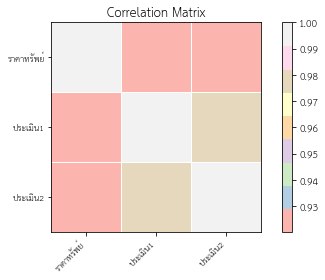

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
corr = homecorr.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Pastel1')
plt.show()

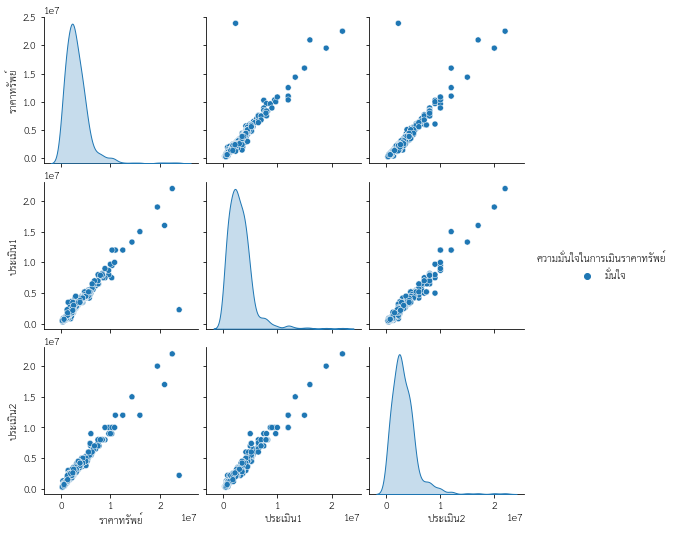

In [ ]:
sns.pairplot(homecorr, hue="ความมั่นใจในการเมินราคาทรัพย์") 

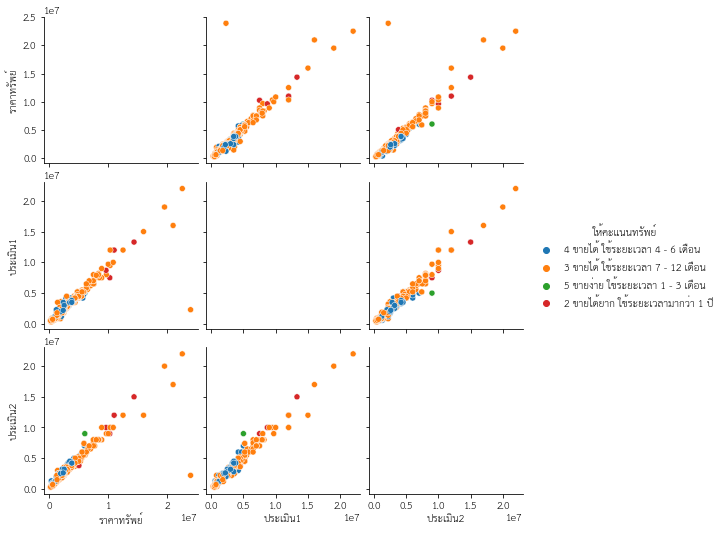

In [ ]:
sns.pairplot(homecorr, hue='ให้คะแนนทรัพย์', diag_kind='Paired') 

 land

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/16Vgq75Q5cOd2adZk-rjMZT_gXZFRlglh0tj4DU7717I/export?format=xlsx'
land = pd.read_excel(link, sheet_name='land')

In [ ]:
idl1 = land[land['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = land[land['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [ ]:
idl2['ประเมิน1'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
idl2 = idl2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
tableLand = idl2[['post id','ความมั่นใจในการเมินราคาทรัพย์','ราคาทรัพย์','ประเมิน1','ประเมิน2','ให้คะแนนทรัพย์']]
tableLand # we got table 

,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/1033,มั่นใจ,2800000,1800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,https://nayoo.co/khonkaen/posts/1711,มั่นใจ,14900000,8000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,https://nayoo.co/khonkaen/posts/1726,มั่นใจ,90000000,18000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,https://nayoo.co/khonkaen/posts/1732,มั่นใจ,65000000,35000000.0,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,https://nayoo.co/khonkaen/posts/1866,มั่นใจ,3000000,2200000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,มั่นใจ,5000000,4000000.0,4000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
202,https://nayoo.co/khonkaen/posts/16072,มั่นใจ,750000,500000.0,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
204,https://nayoo.co/khonkaen/posts/17093,มั่นใจ,2650000,2000000.0,2500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,https://nayoo.co/khonkaen/posts/17112,มั่นใจ,1300000,1500000.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
def checkvalue(a, b):
  return max(a/b, b/a)

In [ ]:
checkland1 = list() # ตั้งให้ check2 เป็น list ว่าง เพื่อให้ for loop มันรันค่าใส่ไว่้ใน list
checkland2 = list()
for row in tableLand.iterrows():
    checkland1.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
    checkland2.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
checkland1
checkland2
# แต่ละ row ใน table จะทำใช้ function 'checkvalue' เพื่อหาค่าแล้วเพิ่มใน check1

[1.4,
 1.2416666666666667,
 1.2857142857142858,
 1.0833333333333333,
 1.2,
 1.2,
 1.2692307692307692,
 1.1363636363636365,
 1.2,
 1.1166666666666667,
 1.3333333333333333,
 1.0909090909090908,
 2.8125,
 1.0,
 1.0606060606060606,
 1.9166666666666667,
 1.0416666666666667,
 1.0285714285714285,
 13.61111111111111,
 1.9285714285714286,
 1.1111111111111112,
 1.1,
 1.1764705882352942,
 1.25,
 10.909090909090908,
 1.0012515644555695,
 1.1111111111111112,
 1.35,
 1.2753333333333334,
 1.25,
 1.1666666666666667,
 1.2,
 1.1904761904761905,
 1.12,
 1.225,
 1.2666666666666666,
 1.2,
 1.2,
 1.1363636363636365,
 1.144,
 1.2,
 1.1627906976744187,
 1.0666666666666667,
 1.0588235294117647,
 1.2352941176470589,
 1.2375,
 1.16,
 1.01,
 1.1583333333333334,
 1.0833333333333333,
 1.1583333333333334,
 1.3,
 1.0476190476190477,
 1.0714285714285714,
 1.075,
 1.333,
 1.0769230769230769,
 1.25,
 1.40375,
 1.0968333333333333,
 1.1363636363636365,
 1.125,
 1.0625,
 1.18,
 1.25,
 1.0555555555555556,
 1.2,
 5.294117647

In [ ]:
tableLand['Check1'] = checkland1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
tableLand[  'Check2'] = checkland2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2
tableLand.sort_values(by=['Check2'],ascending=False)

<ipython-input-137-2b1367fbae22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableLand['Check1'] = checkland1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
<ipython-input-137-2b1367fbae22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableLand[  'Check2'] = checkland2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
47,https://nayoo.co/khonkaen/posts/7349,มั่นใจ,245000000,24000000.0,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,มั่นใจ,120000000,14000000.0,11000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,มั่นใจ,7374550,6000000.0,80000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,มั่นใจ,2300000,2500000.0,24000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,มั่นใจ,1700000,1600000.0,9000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.062500,5.294118
...,...,...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,มั่นใจ,8080000,2800000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,มั่นใจ,7990000,10000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,มั่นใจ,750000,500000.0,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,มั่นใจ,3500000,2800000.0,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.250000,1.000000


In [ ]:
#index 47 ราคาทรัพย์ 245 ล้าน ->  ประเมิน1 = 24 ล้าน ประเมิน2 = 18ล้าน -> ขาด 0 แก้เป็น *10 ทั้ง 2 column [19]
#index 58 ราคาทรัพย์ 120 ล้าน ->  ประเมิน1 = 14 ล้าน ประเมิน2 = 11ล้าน -> ขาด 0 แก้เป็น *10 ทั้ง 2 column [25]
#index 148 ราคาทรัพย์ 7.3ล้าน -> ประเมิน2 = 80 ล้าน -> เกิน 0 /10  [20]
#index 188 ราคาทรัพย์ 2.3ล้าน -> ประเมิน2 = 24 ล้าน -> เกิน 0/10  [89]
missingL1 = tableLand.iloc[18,3]*10
missingL2 = tableLand.iloc[18,4]*10
missingL3 = tableLand.iloc[24,3]*10
missingL4 = tableLand.iloc[24,4]*10
missingL5 = tableLand.iloc[69,4]/10
missingL6 = tableLand.iloc[89,4]/10
tableLand.iloc[18,3] = missingL1
tableLand.iloc[18,4] = missingL2
tableLand.iloc[24,3] = missingL3
tableLand.iloc[24,4] = missingL4
tableLand.iloc[69,4] = missingL5
tableLand.iloc[89,4] = missingL6
tableLand.sort_values(by=['Check2'],ascending=False)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
47,https://nayoo.co/khonkaen/posts/7349,มั่นใจ,245000000,240000000.0,180000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,มั่นใจ,120000000,140000000.0,110000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,มั่นใจ,7374550,6000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,มั่นใจ,2300000,2500000.0,2400000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,มั่นใจ,1700000,1600000.0,9000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.062500,5.294118
...,...,...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,มั่นใจ,8080000,2800000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,มั่นใจ,7990000,10000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,มั่นใจ,750000,500000.0,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,มั่นใจ,3500000,2800000.0,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1.250000,1.000000


In [ ]:
idl1MAPE = MAPE(tableLand['ประเมิน1'],pd.to_numeric(tableLand['ราคาทรัพย์']))
idl2MAPE = MAPE(tableLand['ประเมิน2'],pd.to_numeric(tableLand['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
onel2two = MAPE(tableLand['ประเมิน1'],tableLand['ประเมิน2'])
twol2one = MAPE(tableLand['ประเมิน2'],tableLand['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((onel2two)+(twol2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tableLand)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 63.12%
นักประเมิน คนที่ 2 = 19.94%
ความผิดพลาดระหว่างนักประเมินทั้ง 47.37%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


Plot Graph

In [ ]:
landcorr = tableLand[['ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมิน1','ประเมิน2', 'ให้คะแนนทรัพย์']]

In [ ]:
landcorr.corr(method='pearson')

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.945128,0.995371
ประเมิน1,0.945128,1.000000,0.936201
ประเมิน2,0.995371,0.936201,1.000000


In [ ]:
landcorr1 = landcorr.corr()

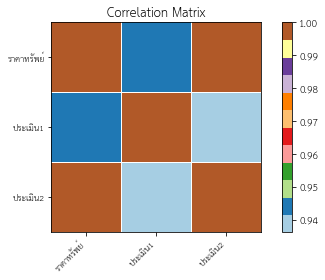

In [ ]:
sm.graphics.plot_corr(landcorr1, xnames=list(corr.columns), cmap='Paired')
plt.show()

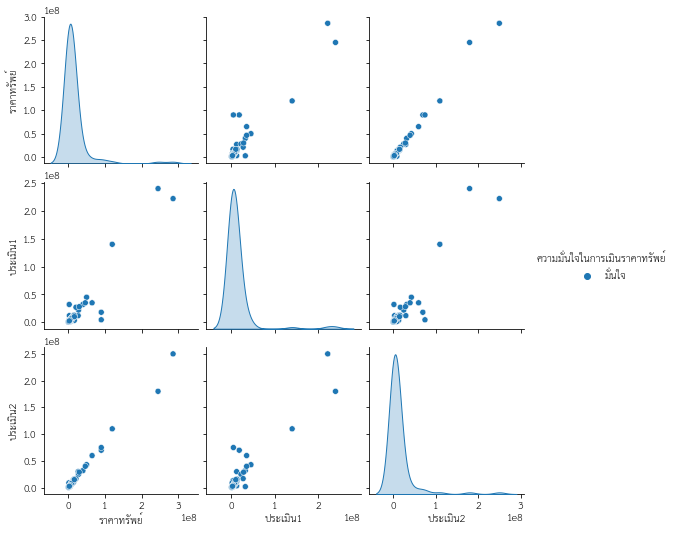

In [ ]:
sns.pairplot(landcorr, hue="ความมั่นใจในการเมินราคาทรัพย์")

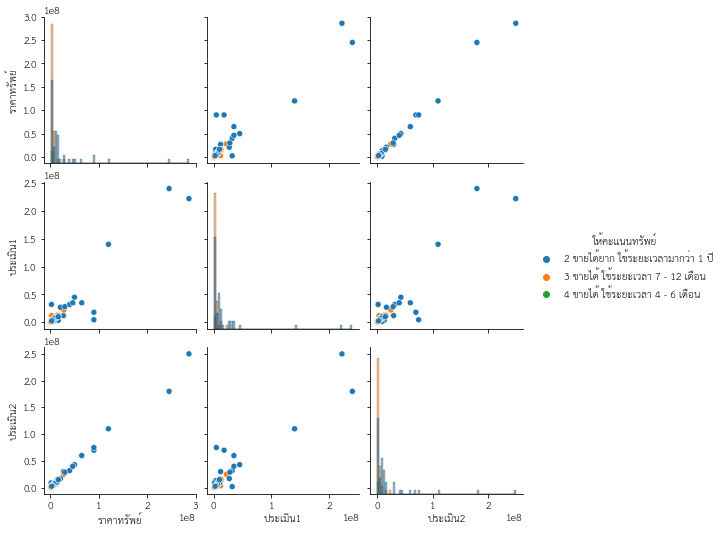

In [ ]:
sns.pairplot(landcorr, hue="ให้คะแนนทรัพย์", diag_kind="hist")

Townhouse

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/16Vgq75Q5cOd2adZk-rjMZT_gXZFRlglh0tj4DU7717I/export?format=xlsx'
Townhouse = pd.read_excel(link, sheet_name='townhouse')

In [ ]:
idt1 = Townhouse[Townhouse['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = Townhouse[Townhouse['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [ ]:
idt2['ประเมิน1'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
idt2 = idt2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
tableTownhouse = idt2[['post id','ความมั่นใจในการเมินราคาทรัพย์','ราคาทรัพย์','ประเมิน1','ประเมิน2','ให้คะแนนทรัพย์']]
tableTownhouse # we got table 

,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/548,มั่นใจ,1045000,700000.0,1500000.0,1 ขายไม่ได้แน่นอน
3,https://nayoo.co/khonkaen/posts/549,มั่นใจ,935000,700000.0,1500000.0,1 ขายไม่ได้แน่นอน
5,https://nayoo.co/khonkaen/posts/579,มั่นใจ,2520000,3500000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/580,มั่นใจ,3850000,3500000.0,3200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/582,มั่นใจ,544000,1000000.0,800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,มั่นใจ,1105000,1000000.0,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
236,https://nayoo.co/khonkaen/posts/18551,มั่นใจ,1440000,1500000.0,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
237,https://nayoo.co/khonkaen/posts/19434,มั่นใจ,2000000,1600000.0,1900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
238,https://nayoo.co/khonkaen/posts/19501,มั่นใจ,1790000,1600000.0,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
checkth1 = list() # ตั้งให้ check2 เป็น list ว่าง เพื่อให้ for loop มันรันค่าใส่ไว่้ใน list
checkth2 = list()
for row in tableTownhouse.iterrows():
    checkth1.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
    checkth2.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
checkth1
checkth2
# แต่ละ row ใน table จะทำใช้ function 'checkvalue' เพื่อหาค่าแล้วเพิ่มใน check1

[1.4354066985645932,
 1.6042780748663101,
 1.5873015873015872,
 1.203125,
 1.4705882352941178,
 1.065625,
 1.1,
 1.2820512820512822,
 1.1825,
 1.0620689655172413,
 1.1,
 1.144,
 1.0256410256410255,
 1.0371428571428571,
 1.1,
 1.0666666666666667,
 1.0266666666666666,
 1.05,
 1.0909090909090908,
 1.4450867052023122,
 1.1,
 1.0743801652892562,
 1.1916666666666667,
 1.03125,
 1.12,
 1.0294117647058822,
 1.0666666666666667,
 1.069182389937107,
 1.1083333333333334,
 1.037037037037037,
 1.0043668122270741,
 1.0,
 1.0,
 1.04,
 1.036,
 1.0833333333333333,
 1.0112359550561798,
 1.0,
 1.004566210045662,
 1.0692307692307692,
 1.0784313725490196,
 1.0714285714285714,
 1.00625,
 1.288888888888889,
 1.0,
 1.2083333333333333,
 1.0416666666666667,
 1.0826086956521739,
 1.0692307692307692,
 1.0391304347826087,
 1.0217391304347827,
 1.0294117647058822,
 1.0,
 1.1214953271028036,
 1.004566210045662,
 1.0,
 5.475,
 1.0,
 1.0,
 1.0333333333333334,
 1.047486033519553,
 1.0,
 1.045,
 1.0666666666666667,
 1.06

In [ ]:
tableTownhouse['Check1'] = checkth1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
tableTownhouse['Check2'] = checkth2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2
tableTownhouse.sort_values(by=['Check2'],ascending=False) #Clean

<ipython-input-150-36e7687ffa34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableTownhouse['Check1'] = checkth1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
<ipython-input-150-36e7687ffa34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableTownhouse['Check2'] = checkth2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
176,https://nayoo.co/khonkaen/posts/3528,มั่นใจ,2190000,350000.0,400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,มั่นใจ,2850000,2800000.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,มั่นใจ,935000,700000.0,1500000.0,1 ขายไม่ได้แน่นอน,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,มั่นใจ,2520000,3500000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,มั่นใจ,1085000,650000.0,700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.669231,1.550000
...,...,...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,มั่นใจ,2200000,2500000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,มั่นใจ,1700000,1500000.0,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,มั่นใจ,1800000,1700000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,มั่นใจ,1200000,1100000.0,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.090909,1.000000


In [ ]:
idt1MAPE = MAPE(tableTownhouse['ประเมิน1'],pd.to_numeric(tableTownhouse['ราคาทรัพย์']))
idt2MAPE = MAPE(tableTownhouse['ประเมิน2'],pd.to_numeric(tableTownhouse['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nTownhome\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
onet2two = MAPE(tableTownhouse['ประเมิน1'],tableTownhouse['ประเมิน2'])
twot2one = MAPE(tableTownhouse['ประเมิน2'],tableTownhouse['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((onet2two)+(twot2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tableTownhouse)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
Townhome
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


Plot Graph

In [ ]:
datath = tableTownhouse[['ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมิน1','ประเมิน2', 'ให้คะแนนทรัพย์']]
datath.corr(method='pearson')

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.930627,0.920421
ประเมิน1,0.930627,1.000000,0.947670
ประเมิน2,0.920421,0.947670,1.000000


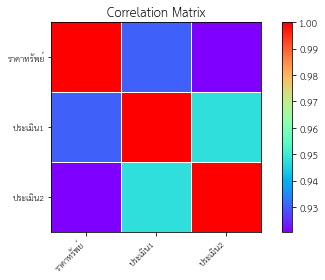

In [ ]:
thcorr = datath.corr()
sm.graphics.plot_corr(thcorr, xnames=list(corr.columns), cmap='rainbow')
plt.show()

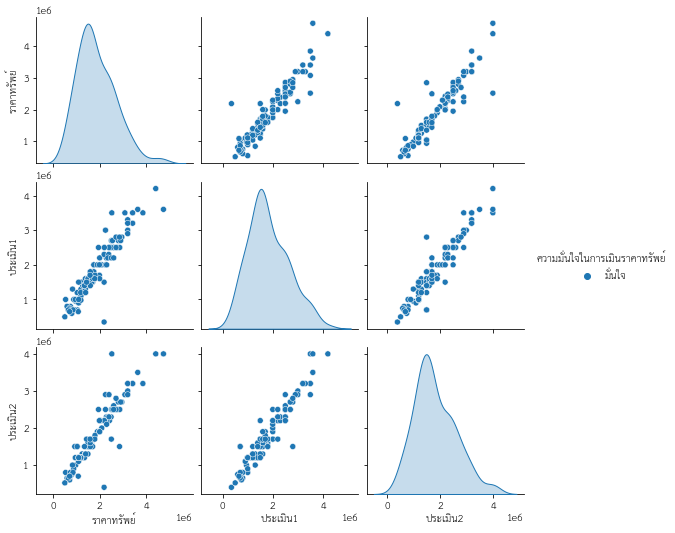

In [ ]:
sns.pairplot(datath, hue="ความมั่นใจในการเมินราคาทรัพย์") 

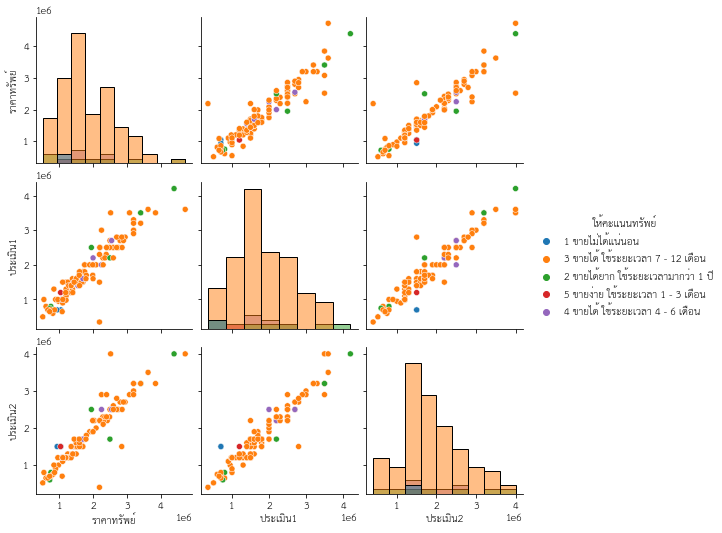

In [ ]:
sns.pairplot(datath, hue="ให้คะแนนทรัพย์" ,diag_kind="hist") 

commercial

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/16Vgq75Q5cOd2adZk-rjMZT_gXZFRlglh0tj4DU7717I/export?format=xlsx'
build = pd.read_excel(link, sheet_name='commercial')

In [ ]:
idb1 = build[build['ID ผู้ประเมิน']==1]
idb1 = idb1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idb2 = build[build['ID ผู้ประเมิน']==2]
idb2 = idb2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [ ]:
idb2['ประเมิน1'] = idb2['post id'].map(idb1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
idb2 = idb2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
tablebuild = idb2[['post id','ความมั่นใจในการเมินราคาทรัพย์','ราคาทรัพย์','ประเมิน1','ประเมิน2','ให้คะแนนทรัพย์']]
tablebuild # we got table 

,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/6,มั่นใจ,6600000,6000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/17,มั่นใจ,11400000,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,https://nayoo.co/khonkaen/posts/21,มั่นใจ,22500000,13500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/22,มั่นใจ,3500000,4000000.0,4000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,https://nayoo.co/khonkaen/posts/24,มั่นใจ,3900000,2200000.0,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,มั่นใจ,2652000,3000000.0,2700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
185,https://nayoo.co/khonkaen/posts/6169,มั่นใจ,3851000,3800000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,https://nayoo.co/khonkaen/posts/6176,มั่นใจ,3410000,3200000.0,3500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
191,https://nayoo.co/khonkaen/posts/7137,มั่นใจ,3900000,3600000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
def checkvalue(a, b):
  return max(a/b, b/a)

In [ ]:
checkbuild1 = list() # ตั้งให้ check2 เป็น list ว่าง เพื่อให้ for loop มันรันค่าใส่ไว่้ใน list
checkbuild2 = list()
for row in tablebuild.iterrows():
    checkbuild1.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
    checkbuild2.append(checkvalue(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
checkbuild1
checkbuild2
# แต่ละ row ใน table จะทำใช้ function 'checkvalue' เพื่อหาค่าแล้วเพิ่มใน check1

[1.2121212121212122,
 1.0526315789473684,
 1.125,
 1.1428571428571428,
 1.3,
 1.2,
 1.0952380952380953,
 1.1904761904761905,
 1.1428571428571428,
 1.1627906976744187,
 1.0330578512396693,
 1.134375,
 1.1,
 1.0576923076923077,
 1.0047846889952152,
 1.2833333333333334,
 1.0860219919453369,
 1.023391812865497,
 1.0256410256410255,
 1.1117021276595744,
 1.0057142857142858,
 1.2222222222222223,
 1.02880658436214,
 1.1733333333333333,
 1.3888888888888888,
 1.0125,
 1.32,
 1.0227272727272727,
 1.0263929618768328,
 1.0263929618768328,
 1.0047846889952152,
 1.21,
 1.1,
 1.0245714285714285,
 1.0671936758893281,
 1.0266666666666666,
 1.175,
 1.0606060606060606,
 1.0227272727272727,
 1.0214285714285714,
 1.0389610389610389,
 1.0526315789473684,
 1.0101010101010102,
 2.206896551724138,
 1.0389610389610389,
 1.1,
 1.0047846889952152,
 1.0833333333333333,
 1.0,
 1.0526315789473684,
 1.09375,
 1.0,
 1.0,
 1.00000020000004,
 1.0144927536231885,
 1.3,
 1.0144927536231885,
 1.1764705882352942,
 1.0,
 1.0

In [ ]:
tablebuild['Check1'] = checkbuild1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
tablebuild['Check2'] = checkbuild2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2
tablebuild.sort_values(by=['Check2'],ascending=False) #Clean

<ipython-input-161-d8c8acd48700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablebuild['Check1'] = checkbuild1 #เพิ่มค่า check1 ไปในคอลัมน์ Check1
<ipython-input-161-d8c8acd48700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablebuild['Check2'] = checkbuild2 #เพิ่มค่า check2 ไปในคอลัมน์ Check2


,post id,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน1,ประเมิน2,ให้คะแนนทรัพย์,Check1,Check2
163,https://nayoo.co/khonkaen/posts/6009,มั่นใจ,2250000,2700000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,มั่นใจ,1450000,2200000.0,3200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1.517241,2.206897
161,https://nayoo.co/khonkaen/posts/5995,มั่นใจ,3000000,3000000.0,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,มั่นใจ,2520000,3300000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1.309524,1.388889
169,https://nayoo.co/khonkaen/posts/6043,มั่นใจ,2240000,3500000.0,3000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1.562500,1.339286
...,...,...,...,...,...,...,...,...
121,https://nayoo.co/khonkaen/posts/2180,มั่นใจ,5000000,4000000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.250000,1.000000
109,https://nayoo.co/khonkaen/posts/1885,มั่นใจ,3500000,3400000.0,3500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.029412,1.000000
107,https://nayoo.co/khonkaen/posts/1858,มั่นใจ,1500000,2000000.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.333333,1.000000
101,https://nayoo.co/khonkaen/posts/1614,มั่นใจ,2500000,2700000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1.080000,1.000000


In [ ]:
idb1MAPE = MAPE(tablebuild['ประเมิน1'],pd.to_numeric(tablebuild['ราคาทรัพย์']))
idb2MAPE = MAPE(tablebuild['ประเมิน2'],pd.to_numeric(tablebuild['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {idb1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idb2MAPE*100:.2f}%')
oneb2two = MAPE(tablebuild['ประเมิน1'],tablebuild['ประเมิน2'])
twob2one = MAPE(tablebuild['ประเมิน2'],tablebuild['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((oneb2two)+(twob2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tablebuild)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 11.70%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


Plot Graph

In [ ]:
databuild = tablebuild[['ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมิน1','ประเมิน2', 'ให้คะแนนทรัพย์']]
databuild.corr(method='pearson')

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.961883,0.978076
ประเมิน1,0.961883,1.000000,0.954673
ประเมิน2,0.978076,0.954673,1.000000


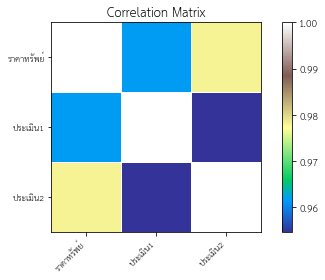

In [ ]:
buildcorr = databuild.corr()
sm.graphics.plot_corr(buildcorr, xnames=list(corr.columns), cmap='terrain')
plt.show()

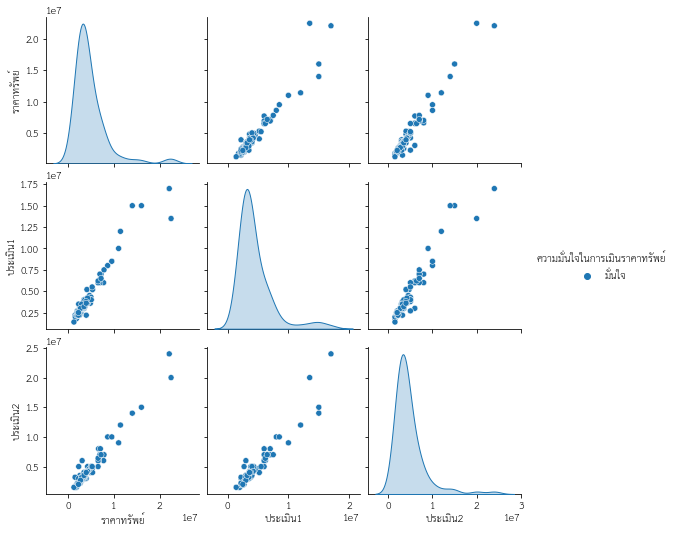

In [ ]:
sns.pairplot(databuild, hue="ความมั่นใจในการเมินราคาทรัพย์")

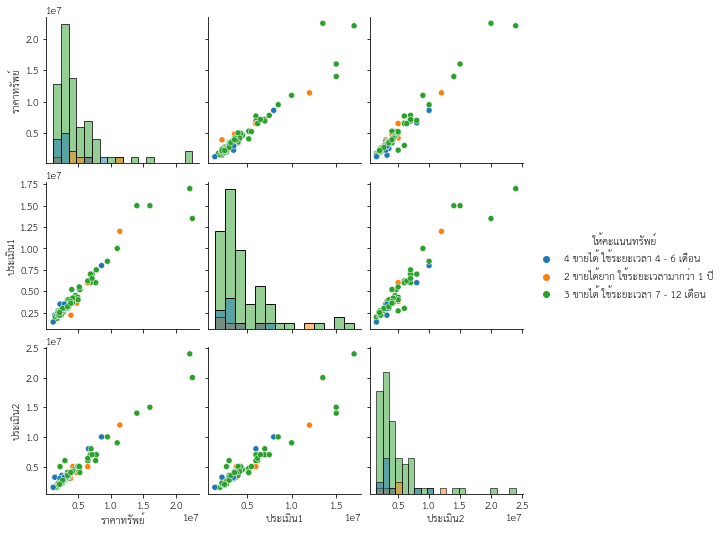

In [ ]:
sns.pairplot(databuild, hue="ให้คะแนนทรัพย์", diag_kind="hist")